In [2]:
import pandas as pd
import warnings
import numpy as np
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
# from sklearn.svm import SVR
# from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# from sklearn.model_selection import RandomizedSearchCV
# from xgboost import XGBRegressor 
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'matplotlib'

In [1]:
import requests
import csv


In [4]:
# Your API URL
url = "https://api.openweathermap.org/data/2.5/air_pollution/history?lat=40.7128&lon=-74.0060&start=1577836800&end=1704067199&appid=b932abb3082f8ca68ec9cab740d62ccb"

# Send GET request
response = requests.get(url)
data = response.json()

# Assuming 'data' contains a list of air quality records
with open('air_quality_data1.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow([ 'AQI', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3','no','nh3'])  # Example columns

    for record in data['list']:
        # Extract and write data to CSV
        writer.writerow([ record['main']['aqi'], record['components']['pm2_5'], record['components']['pm10'], record['components']['no2'], record['components']['so2'], record['components']['co'], record['components']['o3'], record['components']['nh3'], record['components']['no'],])

## aqi calculation---https://www.kaggle.com/code/rohanrao/calculating-aqi-air-quality-index-tutorial

In [2]:
df=pd.read_csv("AQI Forecast/air_quality_data.csv")
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,01-01-2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,02-01-2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,03-01-2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,04-01-2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,05-01-2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,27-06-2020,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,28-06-2020,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,29-06-2020,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,30-06-2020,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [3]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,01-01-2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,02-01-2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,03-01-2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,04-01-2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,05-01-2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,27-06-2020,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,28-06-2020,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,29-06-2020,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,30-06-2020,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


**Data Preprocessing**

In [4]:
df.shape

(29531, 16)

In [5]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,01-01-2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,02-01-2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,03-01-2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,04-01-2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,05-01-2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,27-06-2020,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,28-06-2020,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,29-06-2020,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,30-06-2020,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [6]:
df.dtypes

City           object
Date           object
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
Xylene        float64
AQI           float64
AQI_Bucket     object
dtype: object

In [7]:
df.isna().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [8]:
df.dropna(inplace=True)


In [9]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
2123,Amaravati,25-11-2017,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2124,Amaravati,26-11-2017,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
2125,Amaravati,27-11-2017,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
2126,Amaravati,28-11-2017,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate
2127,Amaravati,29-11-2017,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74,0.21,4.71,0.08,173.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29525,Visakhapatnam,26-06-2020,7.63,32.27,5.91,23.27,17.19,11.15,0.46,6.87,19.90,1.45,5.37,1.45,47.0,Good
29526,Visakhapatnam,27-06-2020,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,28-06-2020,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,29-06-2020,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory


In [10]:
df.AQI_Bucket.value_counts()

AQI_Bucket
Moderate        2521
Satisfactory    2079
Poor             648
Good             454
Very Poor        410
Severe           124
Name: count, dtype: int64

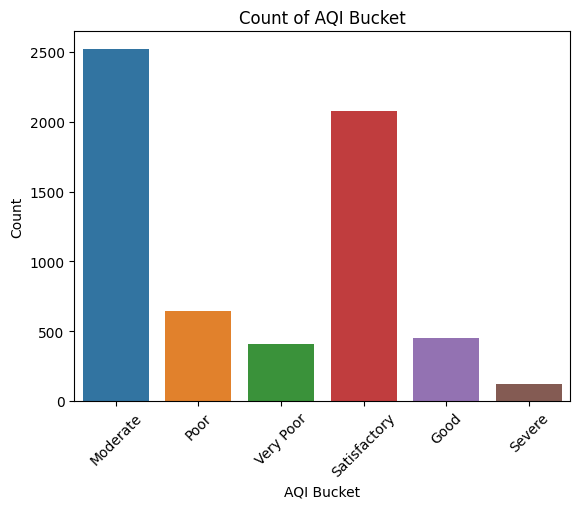

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'AQI_Bucket Name' is the correct column name
sns.countplot(x='AQI_Bucket', data=df)
plt.title('Count of AQI Bucket')
plt.xlabel('AQI Bucket')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


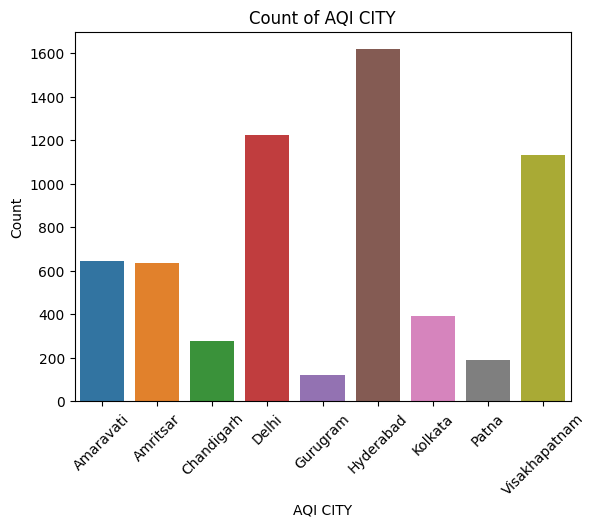

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'AQI_Bucket Name' is the correct column name
sns.countplot(x='City', data=df)
plt.title('Count of AQI CITY')
plt.xlabel('AQI CITY')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [13]:
df.City.value_counts()

City
Hyderabad        1618
Delhi            1224
Visakhapatnam    1131
Amaravati         646
Amritsar          636
Kolkata           394
Chandigarh        277
Patna             191
Gurugram          119
Name: count, dtype: int64

In [14]:
# city_dict={
#     'Amaravati':1,
#     'Amritsar':2,
#     'Chandigarh':3,
#     'Delhi':4,
#     'Gurugram':5,
#     'Hyderabad':6,
#     'Kolkata':7,
#     'Patna':8,
#     'Visakhapatnam':9
    
# }

# df['City']=df['City'].map(city_dict)


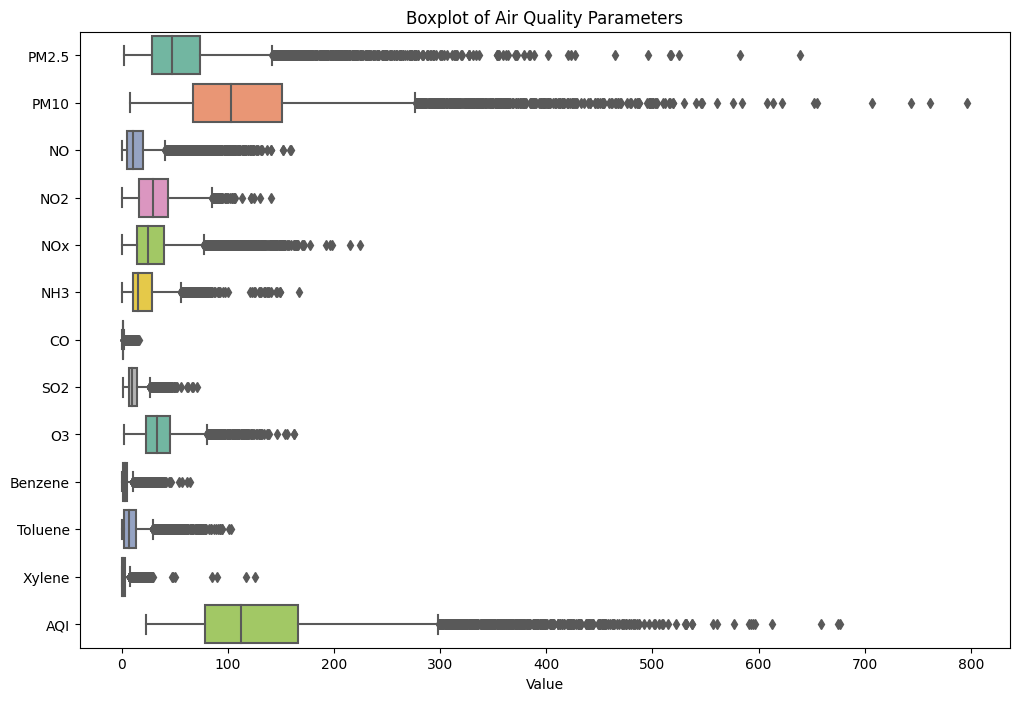

In [15]:
columns_to_plot = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene','AQI']

# Draw boxplot using Seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[columns_to_plot], orient='h', palette='Set2')
plt.xlabel('Value')
plt.title('Boxplot of Air Quality Parameters')
plt.show()

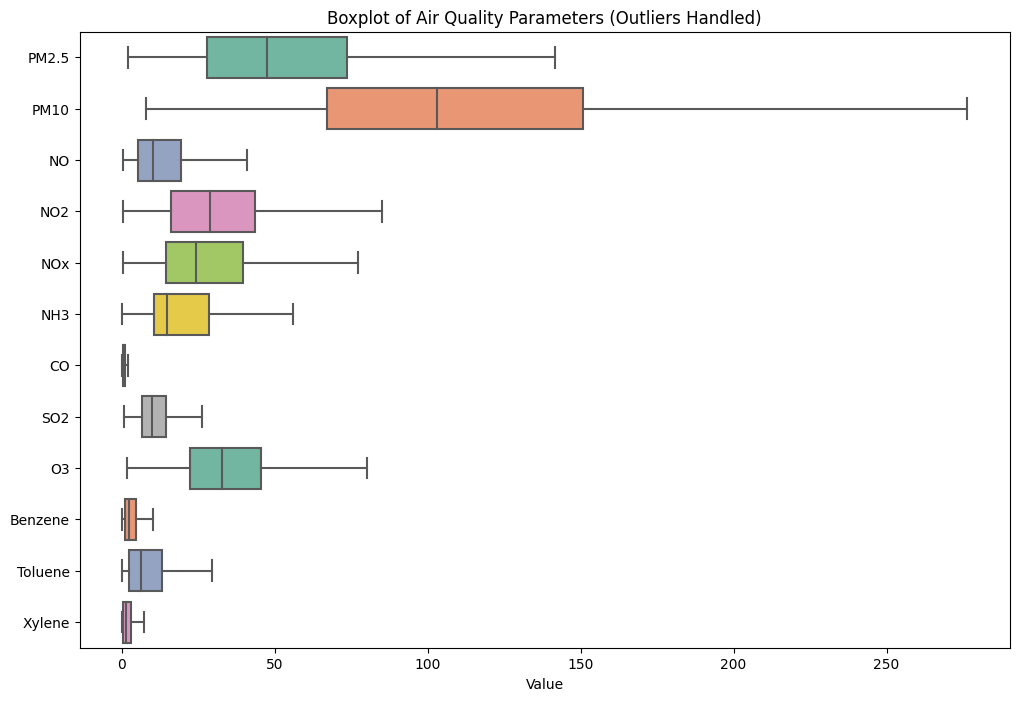

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns you want to plot
columns_to_plot = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']

# Define a function to detect and handle outliers using IQR method
def handle_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_clipped = data.clip(lower=lower_bound, upper=upper_bound)
    return data_clipped

# Handle outliers for each column
for col in columns_to_plot:
    df[col] = handle_outliers(df[col])

# Draw boxplot using Seaborn after handling outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[columns_to_plot], orient='h', palette='Set2')
plt.xlabel('Value')
plt.title('Boxplot of Air Quality Parameters (Outliers Handled)')
plt.show()


<Figure size 1200x800 with 0 Axes>

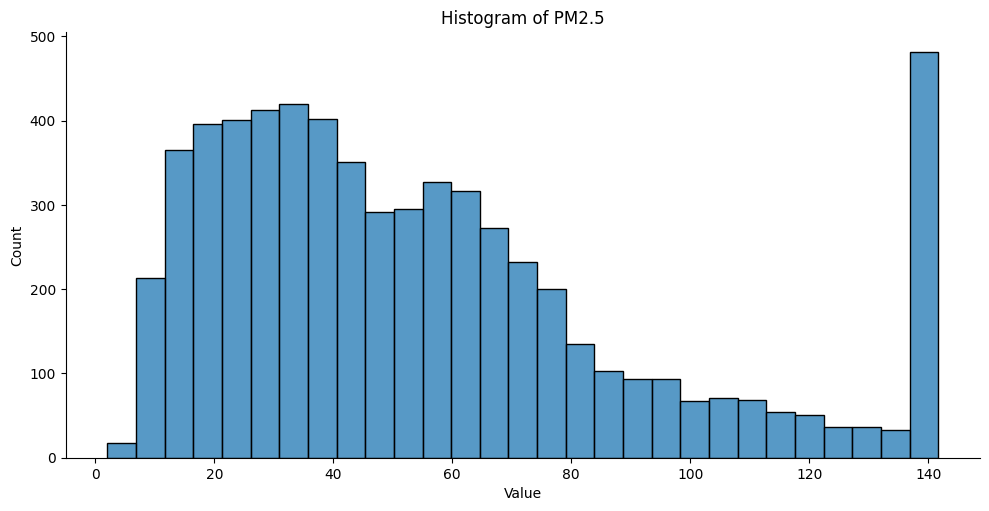

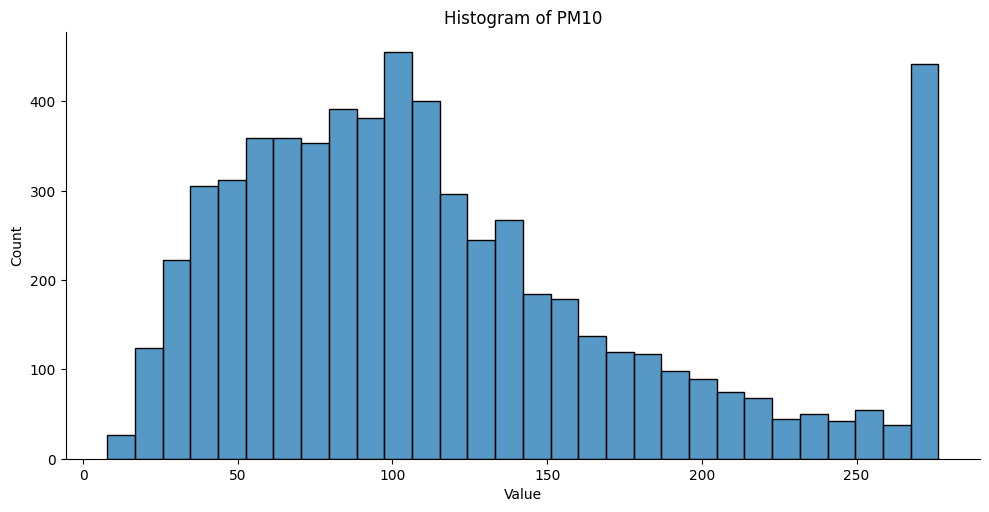

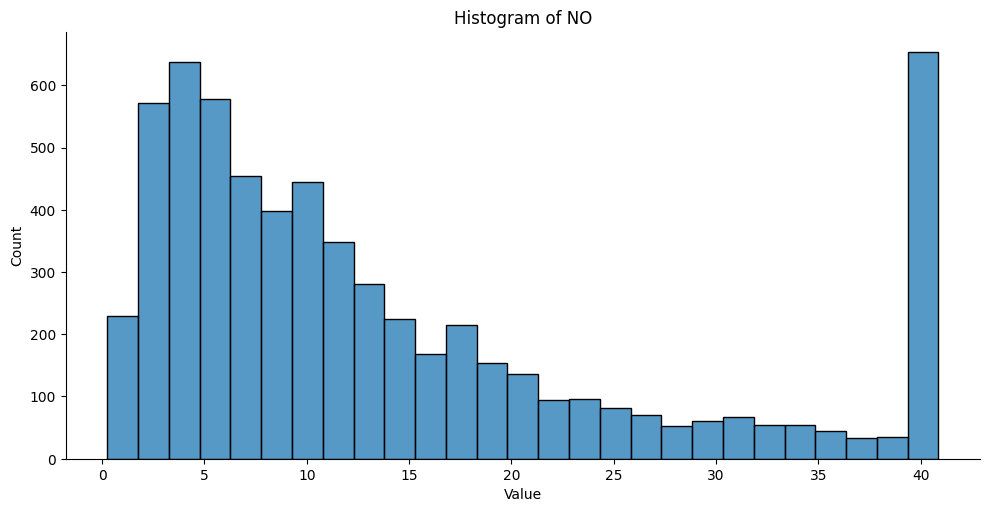

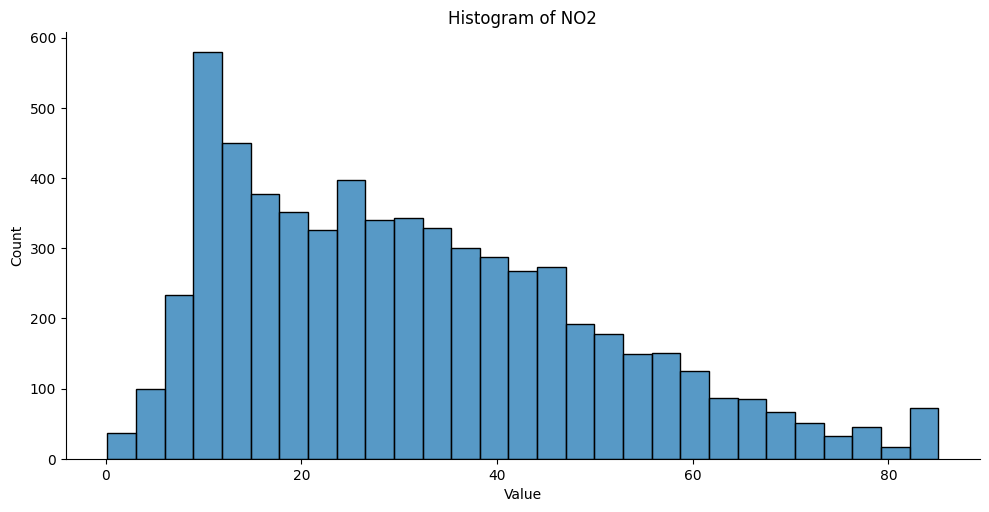

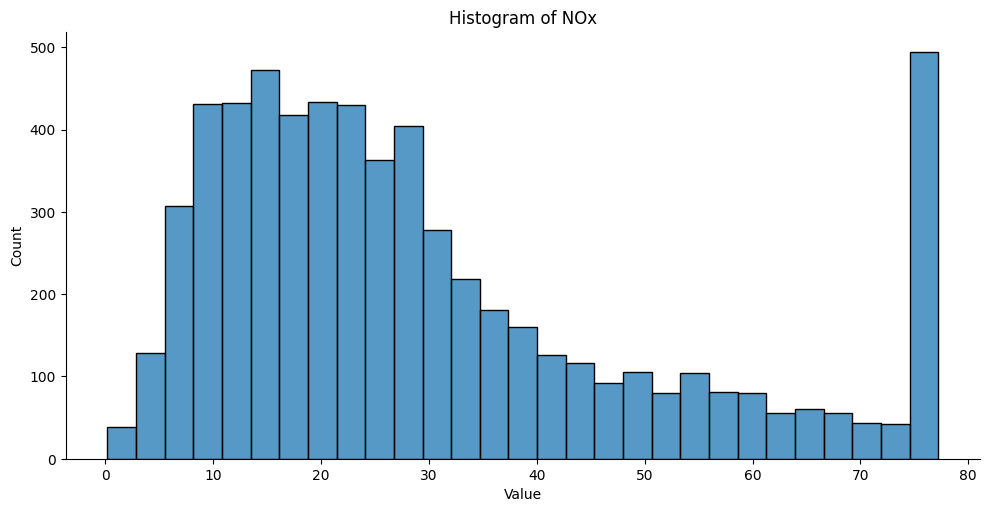

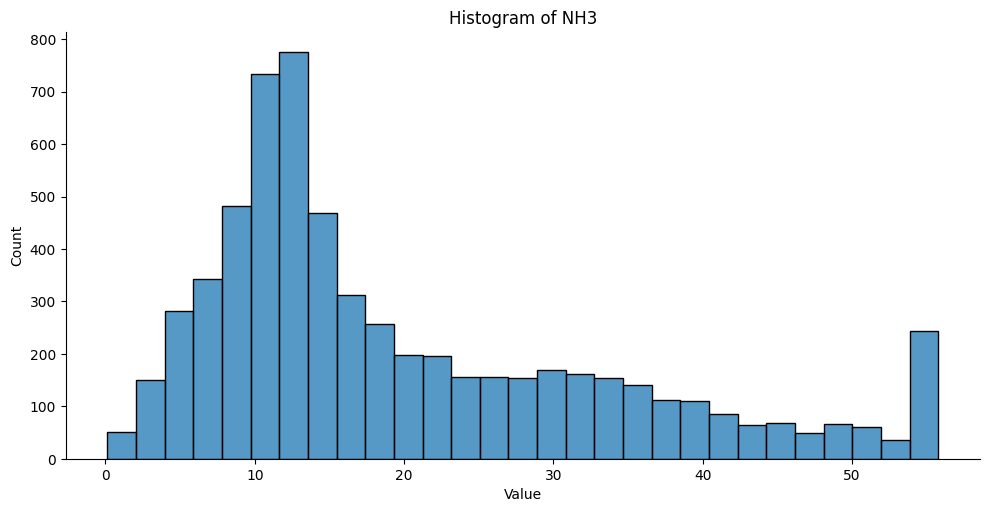

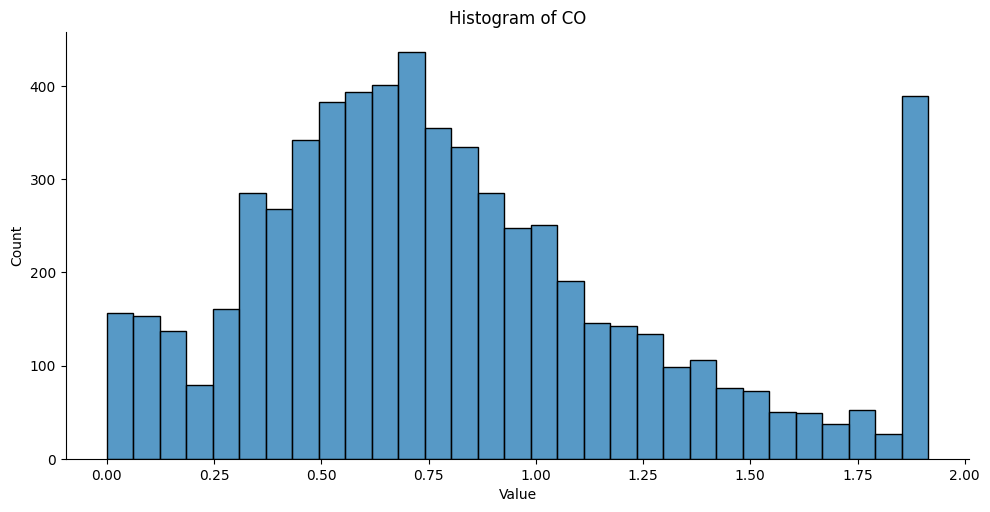

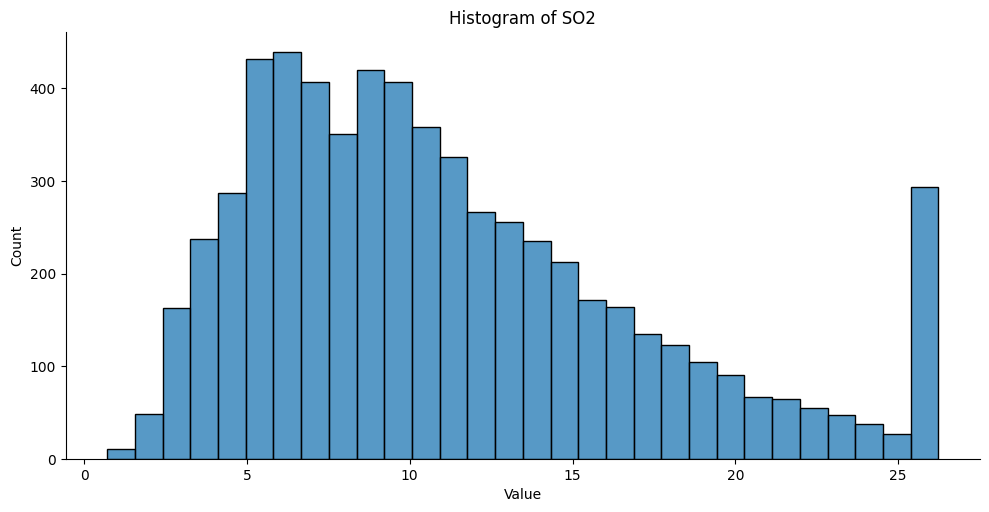

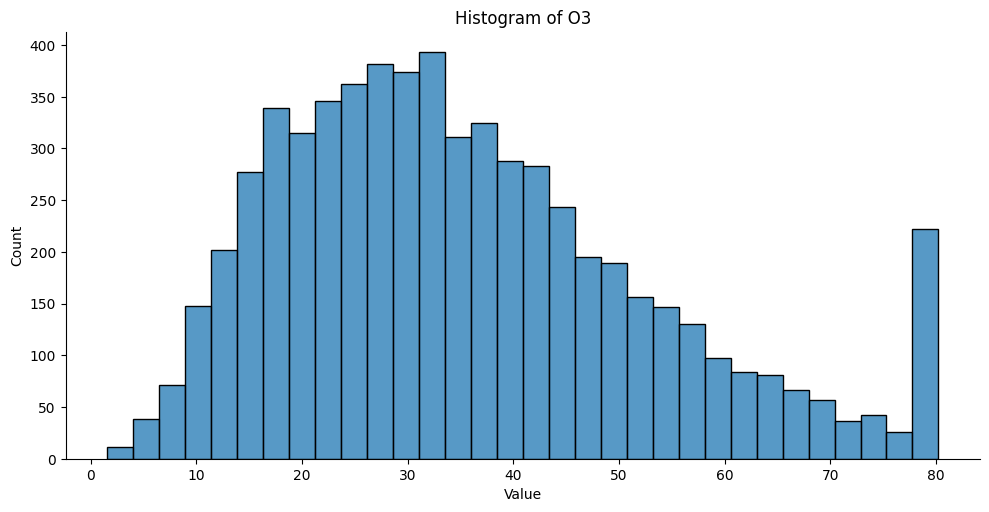

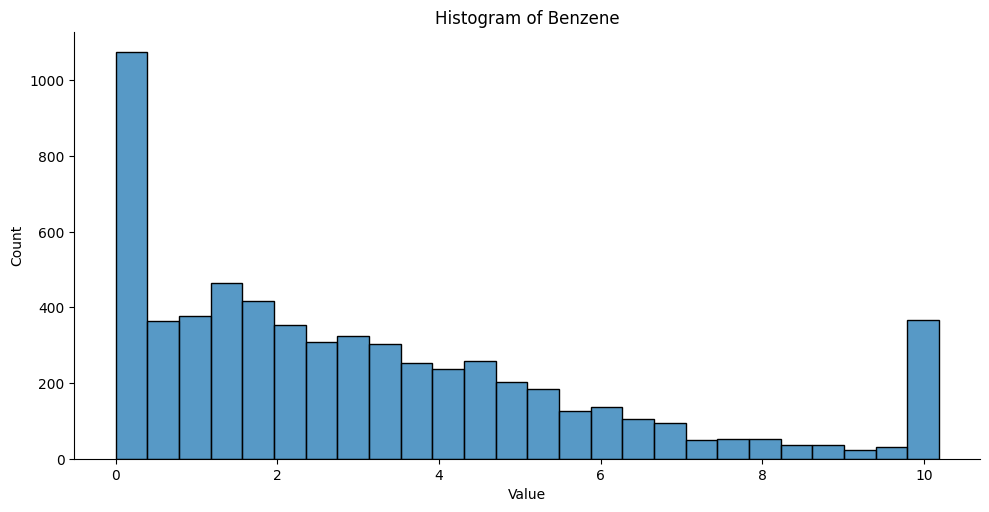

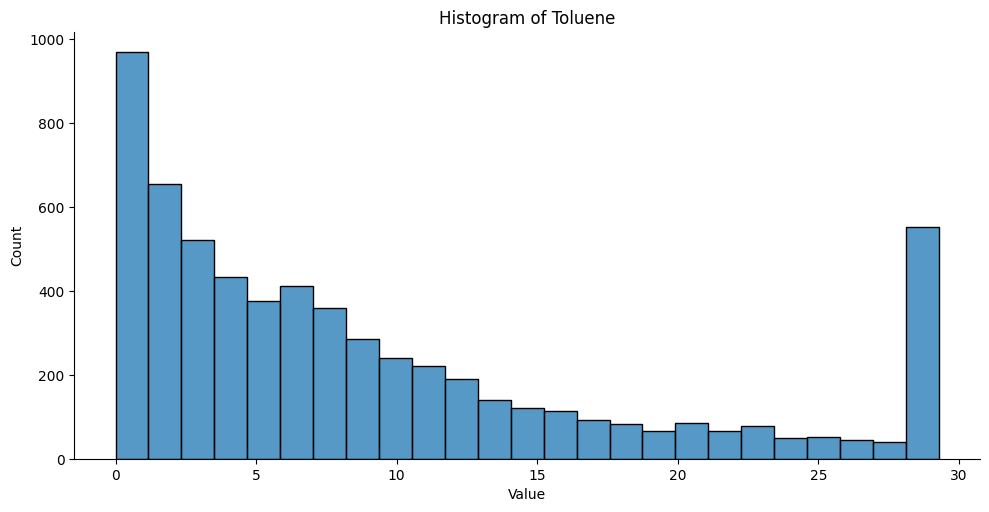

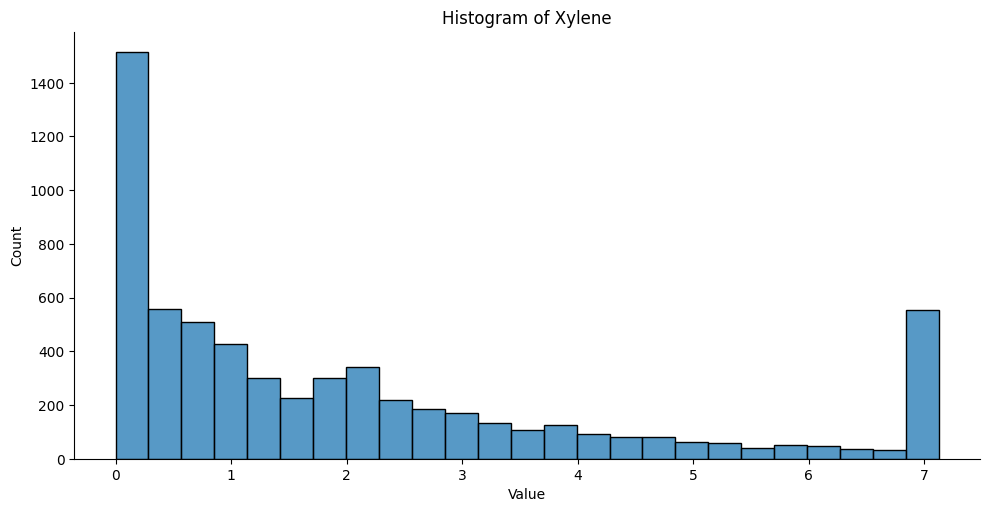

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns you want to plot
columns_to_plot = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']

# Draw separate histograms for each column using a loop
plt.figure(figsize=(12, 8))
for col in columns_to_plot:
    sns.displot(data=df[col], kind='hist', palette='Set2', aspect=2)
    plt.xlabel('Value')
    plt.title(f'Histogram of {col}')
    plt.show()


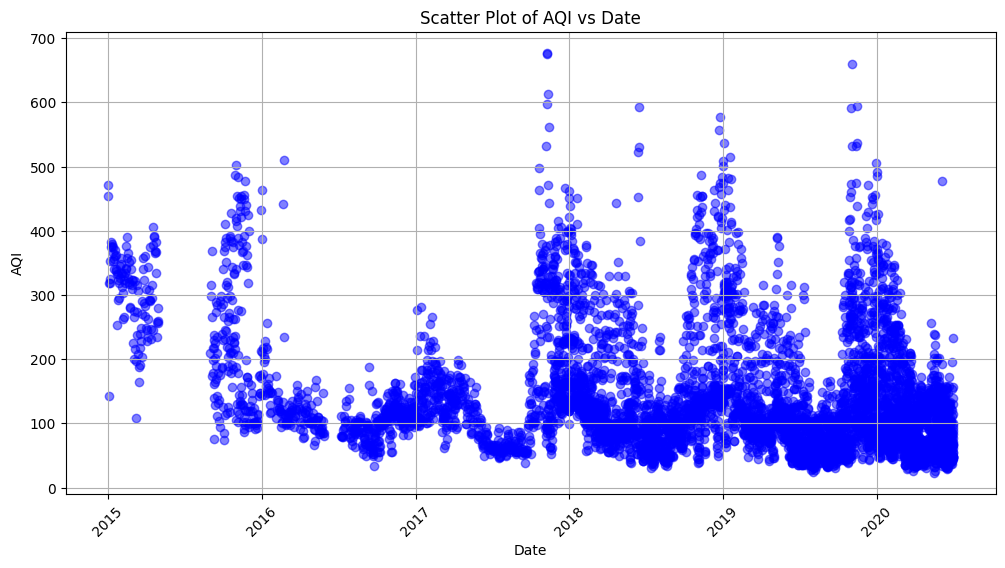

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the AQI dataset
# Convert 'date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(df['Date'], df['AQI'], color='blue', alpha=0.5)
plt.title('Scatter Plot of AQI vs Date')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()


In [19]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
2123,Amaravati,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24000,80.245,0.20,6.50,0.06,184.0,Moderate
2124,Amaravati,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.23875,80.245,0.22,7.95,0.08,197.0,Moderate
2125,Amaravati,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,26.23875,80.245,0.29,7.63,0.12,198.0,Moderate
2126,Amaravati,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00000,80.245,0.17,5.02,0.07,188.0,Moderate
2127,Amaravati,2017-11-29,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55000,80.245,0.21,4.71,0.08,173.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29525,Visakhapatnam,2020-06-26,7.63,32.27,5.91,23.27,17.19,11.15,0.46,6.87000,19.900,1.45,5.37,1.45,47.0,Good
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55000,23.300,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72000,30.140,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42000,30.960,0.01,0.01,0.00,68.0,Satisfactory


In [20]:
df.describe()

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,6236,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000
mean,2018-11-09 22:01:32.366902016,56.413538,117.827965,14.372293,31.608567,30.204506,20.146316,0.815040,11.170071,35.503889,3.142498,9.243995,2.073368,140.510103
min,2015-01-01 00:00:00,2.000000,7.800000,0.250000,0.170000,0.170000,0.120000,0.000000,0.710000,1.550000,0.000000,0.000000,0.000000,23.000000
25%,2018-01-27 00:00:00,27.927500,66.970000,5.080000,15.977500,14.547500,10.390000,0.490000,6.557500,22.357500,0.910000,2.210000,0.300000,78.000000
50%,2019-03-12 00:00:00,47.490000,103.010000,10.060000,28.900000,24.285000,14.690000,0.730000,9.875000,32.540000,2.435000,6.310000,1.250000,112.000000
75%,2019-12-21 06:00:00,73.442500,150.770000,19.392500,43.632500,39.622500,28.545000,1.060000,14.430000,45.512500,4.620000,13.040000,3.030000,166.000000
max,2020-07-01 00:00:00,141.715000,276.470000,40.861250,85.115000,77.235000,55.777500,1.915000,26.238750,80.245000,10.185000,29.285000,7.125000,677.000000
std,NaN,36.933360,68.462289,12.176034,18.433298,20.700219,13.786134,0.471888,5.992579,17.476643,2.799918,8.868071,2.194031,92.738826


In [21]:
corr=df[['Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']].dropna().corr()
corr

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
Date,1.000000,-0.261709,-0.191973,-0.043687,-0.230838,-0.067033,-0.103798,-0.240261,-0.097786,-0.243096,0.045274,0.029100,-0.100646,-0.268611
PM2.5,-0.261709,1.000000,0.904798,0.602374,0.603524,0.653469,0.564925,0.699034,0.309233,0.329361,0.330409,0.411929,0.115687,0.920506
PM10,-0.191973,0.904798,1.000000,0.641925,0.650994,0.698940,0.575999,0.677324,0.340928,0.326012,0.360829,0.462431,0.140239,0.892763
NO,-0.043687,0.602374,0.641925,1.000000,0.547631,0.856114,0.468963,0.618668,0.250399,0.013257,0.457564,0.418619,0.251980,0.625929
NO2,-0.230838,0.603524,0.650994,0.547631,1.000000,0.715505,0.421548,0.517870,0.403099,0.258421,0.342660,0.507196,0.180326,0.577533
NOx,-0.067033,0.653469,0.698940,0.856114,0.715505,1.000000,0.433170,0.679427,0.234505,0.068216,0.541836,0.528878,0.313199,0.658643
NH3,-0.103798,0.564925,0.575999,0.468963,0.421548,0.433170,1.000000,0.486069,0.256231,0.190787,0.175190,0.331685,-0.075944,0.599817
CO,-0.240261,0.699034,0.677324,0.618668,0.517870,0.679427,0.486069,1.000000,0.277711,0.191065,0.388385,0.464053,0.191127,0.713248
SO2,-0.097786,0.309233,0.340928,0.250399,0.403099,0.234505,0.256231,0.277711,1.000000,0.283785,0.069348,0.188885,0.011921,0.301838
O3,-0.243096,0.329361,0.326012,0.013257,0.258421,0.068216,0.190787,0.191065,0.283785,1.000000,-0.025089,0.082441,-0.124618,0.331448


In [22]:
rounded_df_corr_2 = np.around(corr, decimals=1)

<Axes: >

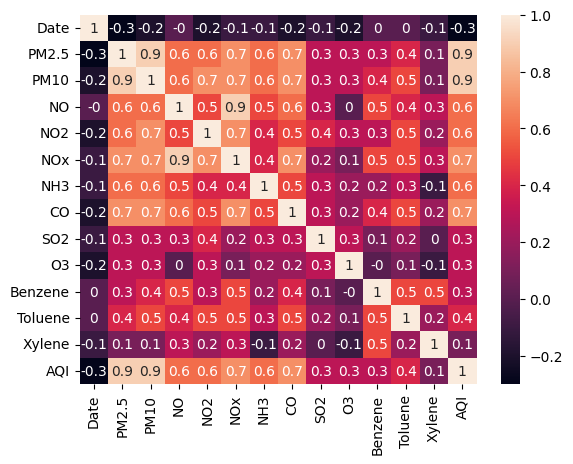

In [23]:
sns.heatmap(rounded_df_corr_2,annot=True)

In [24]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [25]:
df.drop(['Date','AQI_Bucket','City'],axis=1,inplace=True)


In [26]:
df.drop(['Benzene','Toluene','Xylene','NOx'],axis=1,inplace=True)


In [27]:
df.reset_index(drop=True, inplace=True)

In [28]:
df

,PM2.5,PM10,NO,NO2,NH3,CO,SO2,O3,AQI
0,81.40,124.50,1.44,20.50,10.72,0.12,15.24000,80.245,184.0
1,78.32,129.06,1.26,26.00,10.28,0.14,26.23875,80.245,197.0
2,88.76,135.32,6.60,30.85,12.91,0.11,26.23875,80.245,198.0
3,64.18,104.09,2.56,28.07,11.42,0.09,19.00000,80.245,188.0
4,72.47,114.84,5.23,23.20,12.25,0.16,10.55000,80.245,173.0
...,...,...,...,...,...,...,...,...,...
6231,7.63,32.27,5.91,23.27,11.15,0.46,6.87000,19.900,47.0
6232,15.02,50.94,7.68,25.06,12.47,0.47,8.55000,23.300,41.0
6233,24.38,74.09,3.42,26.06,11.99,0.52,12.72000,30.140,70.0
6234,22.91,65.73,3.45,29.53,10.71,0.48,8.42000,30.960,68.0


In [1]:
df=pd.read_csv('AQI_clean.csv')

NameError: name 'pd' is not defined

In [29]:
X = df.drop('AQI', axis = 1)
y = df['AQI']


In [30]:
X

,PM2.5,PM10,NO,NO2,NH3,CO,SO2,O3
0,81.40,124.50,1.44,20.50,10.72,0.12,15.24000,80.245
1,78.32,129.06,1.26,26.00,10.28,0.14,26.23875,80.245
2,88.76,135.32,6.60,30.85,12.91,0.11,26.23875,80.245
3,64.18,104.09,2.56,28.07,11.42,0.09,19.00000,80.245
4,72.47,114.84,5.23,23.20,12.25,0.16,10.55000,80.245
...,...,...,...,...,...,...,...,...
6231,7.63,32.27,5.91,23.27,11.15,0.46,6.87000,19.900
6232,15.02,50.94,7.68,25.06,12.47,0.47,8.55000,23.300
6233,24.38,74.09,3.42,26.06,11.99,0.52,12.72000,30.140
6234,22.91,65.73,3.45,29.53,10.71,0.48,8.42000,30.960


In [31]:
y

0       184.0
1       197.0
2       198.0
3       188.0
4       173.0
        ...  
6231     47.0
6232     41.0
6233     70.0
6234     68.0
6235     54.0
Name: AQI, Length: 6236, dtype: float64

In [32]:

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1,test_size=0.2)

In [33]:
from sklearn.ensemble import GradientBoostingRegressor

gbc = GradientBoostingRegressor(random_state=42, learning_rate=0.1, n_estimators=256, subsample=0.75)
gbc.fit(X_train, y_train)

print('*'*10)

# prediction
train_prediction= gbc.predict(X_train)
test_prediction= gbc.predict(X_test)
print('*'*10)
# evaluation

from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
print('R2 for train data', r2_score(y_train,train_prediction))
print('R2 for test data', r2_score(y_test,test_prediction))
print('*'*10)

print('RMSE for train data', np.sqrt(mean_squared_error(y_train,train_prediction)))
print('RMSE for test data', np.sqrt(mean_squared_error(y_test,test_prediction)))

print('*'*10)

print('*'*10)

**********
**********
R2 for train data 0.9617476258109542
R2 for test data 0.9172834074636478
**********
RMSE for train data 18.097952272119702
RMSE for test data 26.874845686502834
**********
**********


In [34]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=42, max_depth=7, n_estimators=128)
rfr.fit(X_train, y_train)


print('*'*10)

# prediction
train_prediction= rfr.predict(X_train)
test_prediction= rfr.predict(X_test)
print('*'*10)
# evaluation

from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
print('R2 for train data', r2_score(y_train,train_prediction))
print('R2 for test data', r2_score(y_test,test_prediction))
print('*'*10)

print('RMSE for train data', np.sqrt(mean_squared_error(y_train,train_prediction)))
print('RMSE for test data', np.sqrt(mean_squared_error(y_test,test_prediction)))

print('*'*10)



print('*'*10)

**********
**********
R2 for train data 0.9513490863667284
R2 for test data 0.9120075526189734
**********
RMSE for train data 20.41012859719271
RMSE for test data 27.718668208436025
**********
**********


In [35]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42, max_depth= 7)
dt.fit(X_train, y_train)

print('*'*10)

# prediction
train_prediction= dt.predict(X_train)
test_prediction= dt.predict(X_test)
print('*'*10)
# evaluation

from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
print('R2 for train data', r2_score(y_train,train_prediction))
print('R2 for test data', r2_score(y_test,test_prediction))
print('*'*10)

print('RMSE for train data', np.sqrt(mean_squared_error(y_train,train_prediction)))
print('RMSE for test data', np.sqrt(mean_squared_error(y_test,test_prediction)))

print('*'*10)


print('*'*10)

**********
**********
R2 for train data 0.9398734042880377
R2 for test data 0.8912124392894014
**********
RMSE for train data 22.689950504306086
RMSE for test data 30.82047167744615
**********
**********


In [36]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

print('*'*10)

# prediction
train_prediction= lr.predict(X_train)
test_prediction= lr.predict(X_test)
print('*'*10)
# evaluation

from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
print('R2 for train data', r2_score(y_train,train_prediction))
print('R2 for test data', r2_score(y_test,test_prediction))
print('*'*10)

print('RMSE for train data', np.sqrt(mean_squared_error(y_train,train_prediction)))
print('RMSE for test data', np.sqrt(mean_squared_error(y_test,test_prediction)))

print('*'*10)

# cross validation score
from sklearn.model_selection import cross_val_score
score=cross_val_score(lr,X,y,cv=5)
print('cv_score :',score.mean())

print('*'*10)

**********
**********
R2 for train data 0.8808548526032227
R2 for test data 0.8773656082056388
**********
RMSE for train data 31.94025803026065
RMSE for test data 32.72320267480121
**********


cv_score : 0.8173592182121917
**********


In [37]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score

# Create an SVM regressor
svm_regressor = SVR()

# Fit the model
svm_regressor.fit(X_train, y_train)

print('*' * 10)

# Predictions
train_prediction = svm_regressor.predict(X_train)
test_prediction = svm_regressor.predict(X_test)
print('*' * 10)

# Evaluation
print('R2 for train data:', r2_score(y_train, train_prediction))
print('R2 for test data:', r2_score(y_test, test_prediction))
print('*' * 10)

print('RMSE for train data:', np.sqrt(mean_squared_error(y_train, train_prediction)))
print('RMSE for test data:', np.sqrt(mean_squared_error(y_test, test_prediction)))
print('*' * 10)


print('MSE for train data:',(mean_squared_error(y_train, train_prediction)))
print('MSE for test data:',(mean_squared_error(y_test, test_prediction)))
print('*' * 10)


print('AMSE for train data:',(mean_absolute_error(y_train, train_prediction)))
print('AMSE for test data:',(mean_absolute_error(y_test, test_prediction)))
print('*' * 10)



**********
**********
R2 for train data: 0.8655248804454752
R2 for test data: 0.8651588120244812
**********
RMSE for train data: 33.93291821464214
RMSE for test data: 34.313178260968535
**********
MSE for train data: 1151.4429385615927
MSE for test data: 1177.3942023690038
**********
AMSE for train data: 19.430743613249874
AMSE for test data: 19.91008861844767
**********


In [38]:
df.to_csv('AQI_clean.csv',index=False)

## lstm

In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the AQI dataset
df = pd.read_csv('AQI_clean.csv')

# Preprocess the data
X = df.drop('AQI', axis=1).values
y = df['AQI'].values.reshape(-1, 1)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape input data for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))  # Adjusting input shape
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))  # Adjusting input shape

# Define the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)  # Output layer adjusted to predict a single value
])

# Compile the model
model.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError())

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

# Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Train Loss: {train_loss:.4f}')
print(f'Test Loss: {test_loss:.4f}')

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
print(f'Train RMSE: {train_rmse:.2f}')
print(f'Test RMSE: {test_rmse:.2f}')

# Calculate R-squared score
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)
print(f'Train R^2 Score: {train_r2:.2f}')
print(f'Test R^2 Score: {test_r2:.2f}')


Epoch 1/100


c:\Users\saina\Desktop\my projects\airquality\airquality\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 9655.2617 - val_loss: 1127.2286
Epoch 2/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1002.9988 - val_loss: 952.1595
Epoch 3/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1042.5830 - val_loss: 969.9989
Epoch 4/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 882.4804 - val_loss: 833.2045
Epoch 5/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1074.8284 - val_loss: 895.4198
Epoch 6/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 967.0453 - val_loss: 984.9279
Epoch 7/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 957.8665 - val_loss: 859.3882
Epoch 8/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 992.8473 - val_loss: 803.7407
Epoch 9/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 962.5082 - val_loss: 1100.6372
Epoch 10/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 912.2235 - val_loss: 940.6440
Epoch 11/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 947.4572 - val_loss: 896.9935
Epo

## user prediction

In [7]:
model.save('aqi_model.h5')  # Save the model to a file


In [8]:
import numpy as np
from tensorflow.keras.models import load_model

def predict_aqi(input_data):
    # Load the saved model
    loaded_model = load_model('aqi_model.h5')
    
    # Assuming input_data is a list of features, convert it to the expected format
    input_data = np.array(input_data).reshape(1, -1, 1)  # Reshape for a single sample with LSTM expected input
    
    # Make prediction
    prediction = loaded_model.predict(input_data)
    
    return prediction[0][0]  # Return the predicted value

# Example usage:
user_input = [122.88, 208.86, 5.56, 54.87, 17.96, 0.27, 22.97, 68.6]
prediction = predict_aqi(user_input)
print(f"Predicted AQI: {prediction:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
Predicted AQI: 266.57


In [42]:
from tensorflow.keras.models import load_model

# Separate code for prediction based on user input
def predict_aqi(input_data):
    # Load the model
    loaded_model = load_model('aqi_model1.h5')
    
    # Reshape input data
    input_data = np.array(input_data).reshape(1, -1, 1)
    
    # Make prediction
    prediction = loaded_model.predict(input_data)
    
    return prediction

# Example usage:
user_input = [89.35,131.48,7.97,42.1,21.24,0.24,7.42,44.67]  
prediction = predict_aqi(user_input)
print("Predicted AQI:", prediction[0][0])

1/1 [==============================] - 0s 132ms/step
Predicted AQI: 191.28484
